In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


In [2]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rajni7731/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
file_path = '/Users/rajni7731/Documents/Sentiment-Analysis/movie_reviews.csv'  # Adjust the path as necessary
df = pd.read_csv(file_path)


In [4]:
sid = SentimentIntensityAnalyzer()


In [5]:
def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize (split the text into words)
    words = text.split()
    return words


In [8]:
positive_words = ['love', 'fantastic', 'excellent', 'great', 'amazing', 'pleasure', 'masterpiece', 'good']
negative_words = ['terrible', 'boring', 'predictable', 'waste', 'bad', 'worst', 'poor']

def analyze_sentiment(review):
    words = preprocess_text(review)
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)
    sentiment_score = positive_count - negative_count
    return sentiment_score

def vader_sentiment(review):
    scores = sid.polarity_scores(review)
    return scores['compound']


In [9]:
df['simple_sentiment_score'] = df['review'].apply(analyze_sentiment)
df['vader_sentiment_score'] = df['review'].apply(vader_sentiment)


In [10]:
overall_simple_sentiment = df['simple_sentiment_score'].mean()
overall_vader_sentiment = df['vader_sentiment_score'].mean()

if overall_simple_sentiment > 0:
    overall_simple_sentiment_classification = "Positive"
elif overall_simple_sentiment < 0:
    overall_simple_sentiment_classification = "Negative"
else:
    overall_simple_sentiment_classification = "Neutral"

if overall_vader_sentiment > 0:
    overall_vader_sentiment_classification = "Positive"
elif overall_vader_sentiment < 0:
    overall_vader_sentiment_classification = "Negative"
else:
    overall_vader_sentiment_classification = "Neutral"


In [11]:
print("Overall Sentiment (Simple Lexicon):", overall_simple_sentiment)
print("Overall Sentiment Classification (Simple Lexicon):", overall_simple_sentiment_classification)
print("Overall Sentiment (VADER):", overall_vader_sentiment)
print("Overall Sentiment Classification (VADER):", overall_vader_sentiment_classification)

print(df.head())


Overall Sentiment (Simple Lexicon): 1.0352112676056338
Overall Sentiment Classification (Simple Lexicon): Positive
Overall Sentiment (VADER): 0.4189535211267605
Overall Sentiment Classification (VADER): Positive
                                              review  simple_sentiment_score  \
0  I had the pleasure of seeing Kill at its world...                       4   
1  Neither Bruce Lee-style quick action scenes no...                       0   
2  The story is simple - good guys on a train, ba...                       1   
3  Kill is an absolute cinematic masterpiece that...                       1   
4  Did not expect this movie to be soo good consi...                       3   

   vader_sentiment_score  
0                 0.9920  
1                 0.9736  
2                 0.9395  
3                 0.5859  
4                 0.7691  


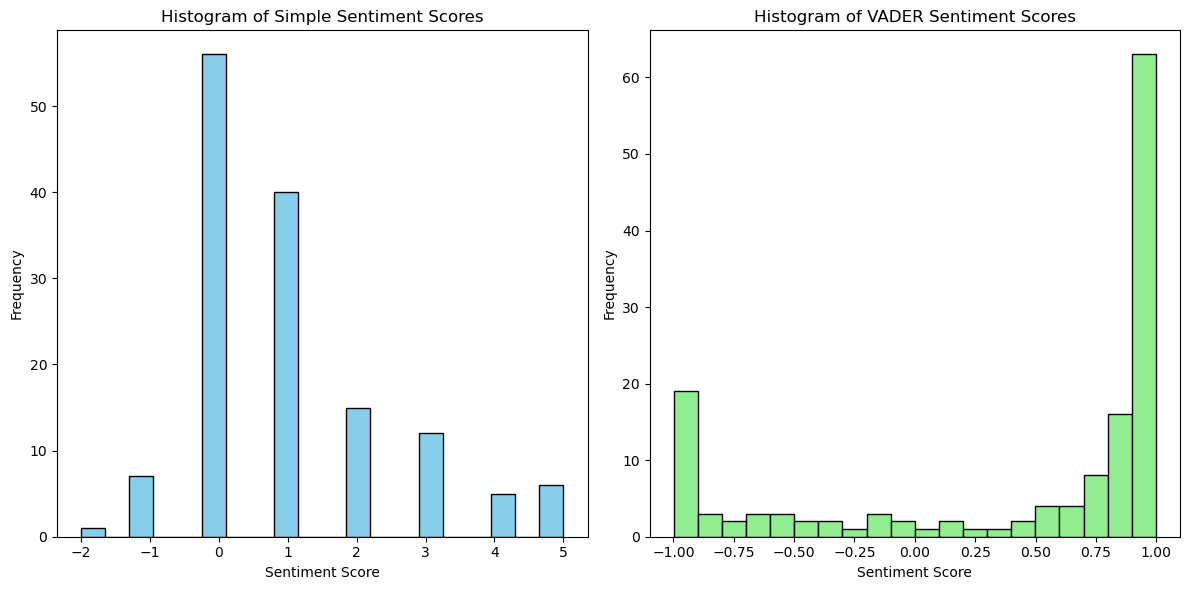

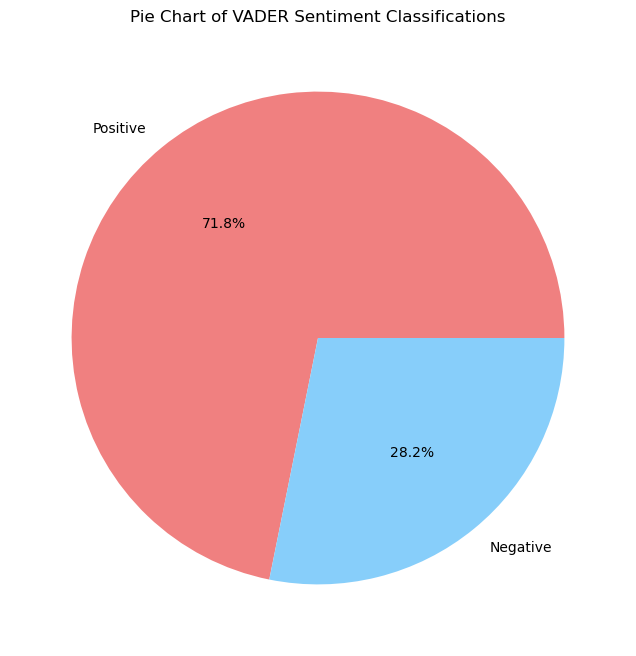

In [12]:
plt.figure(figsize=(12, 6))

# Histogram of Simple Sentiment Scores
plt.subplot(1, 2, 1)
plt.hist(df['simple_sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Simple Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Histogram of VADER Sentiment Scores
plt.subplot(1, 2, 2)
plt.hist(df['vader_sentiment_score'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Pie chart of sentiment classifications (VADER)
vader_class_counts = df['vader_sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral').value_counts()
plt.figure(figsize=(8, 8))
plt.pie(vader_class_counts, labels=vader_class_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Pie Chart of VADER Sentiment Classifications')
plt.show()


In [13]:
df.to_csv('sentiment_analysis_results.csv', index=False)
